## Informasi Mahasiswa

Nama:Sofia

NPM : 2108107010006

# Artificial Neural Network

## Dataset

### Heart Disease

Pada tugas 3 ini, saya menggunakan dataset Heart Disease dari sumber [UCI Edu](https://archive.ics.uci.edu/dataset/45/heart+disease). 

Heart disease (penyakit jantung) menggambarkan berbagai kondisi yang memengaruhi jantung Anda. Penyakit Heart disease, antara lain, blood vessel disease (penyakit pembuluh darah), seperti penyakit arteri koroner, masalah irama jantung (arrhythmias) dan kelainan jantung sejak lahir (congenital heart defects).

Istilah "Heart disease" sering digunakan secara bergantian dengan istilah "cardiovascular disease". cardiovascular disease umumnya merujuk pada kondisi yang melibatkan pembuluh darah yang menyempit atau tersumbat yang dapat menyebabkan serangan jantung, nyeri dada (angina) atau stroke. Kondisi jantung lainnya, seperti kondisi yang memengaruhi otot, katup, atau irama jantung, juga dianggap sebagai bentuk Heart disease.

Dataset ini memberikan sejumlah variabel bersama dengan kondisi target memiliki atau tidak memiliki Heart disease. 

Dataset ini berisi fitur-fitur berikut:
1. age: Usia (years)
2. sex: Jenis Kelamin (1 = male, 0 = female)
3. cp: Nyeri dada yang dialami (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps: Tekanan darah normal pasien (mm Hg)
5. chol: Kolesterol Pasien (mg/dl)
6. fbs: Gula darah puasa pasien (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: Pengukuran elektrokardiografi istirahat (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach: Denyut jantung maksimum
9. exang: Angina yang diinduksi oleh olahraga (1 = yes; 0 = no)
10. oldpeak: Depresi ST yang diinduksi oleh latihan relatif terhadap istirahat ('ST' relates to positions on the ECG plot.)
11. slope: kemiringan segmen ST latihan puncak (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. ca: Jumlah pembuluh darah utama (0-3)
13. thal: Kelainan darah yang disebut talasemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

Dataset ini memiliki label, yaitu:
- target: Penyakit jantung (0 = no, 1 = yes)

## Acessing Data

### Import Libraries

In [1]:
pip install -r requirements.txt

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----------- ---------------------------- 81.9/294.9 kB 1.1 MB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('data/heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Preprocessing Data

Mengecek missing value pada data

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Mengecek duplikasi pada data

In [6]:
df.duplicated().sum()

1

Terdapat 1 data yang duplicate, sehingga dilakukan cleaning dengan drop data duplicate tersebut

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

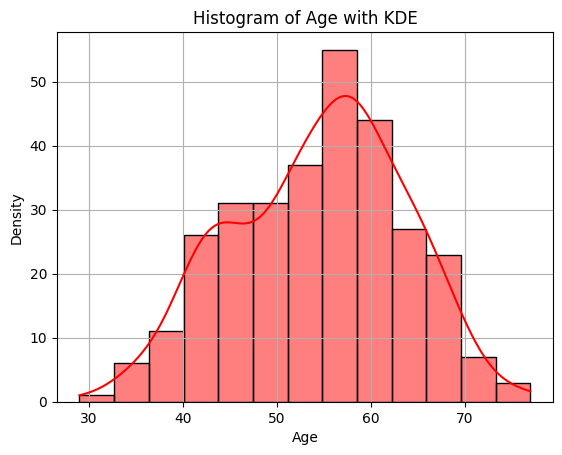

In [16]:
sns.histplot(data=df['age'], kde=True, color='red')
plt.title('Histogram of Age with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Mengecek outlier pada cholesterol

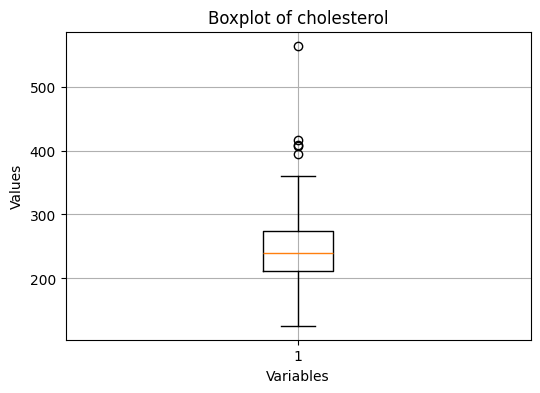

In [17]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['chol'])
plt.title('Boxplot of cholesterol')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

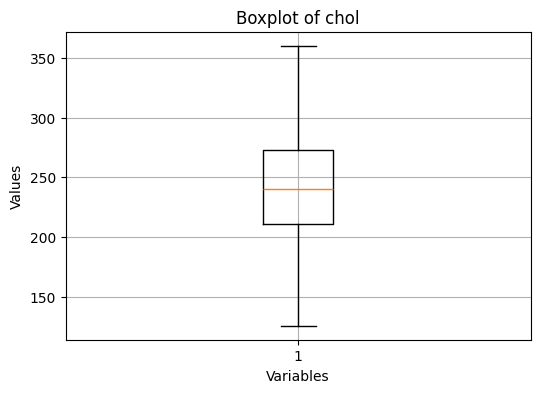

In [18]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]
plt.figure(figsize=(6, 4))
plt.boxplot(df['chol'])
plt.title('Boxplot of chol')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

Mengecek outlier pada kolom trestbps

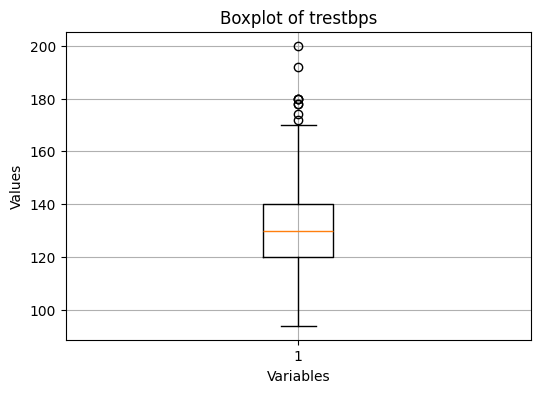

In [19]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['trestbps'])
plt.title('Boxplot of trestbps')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

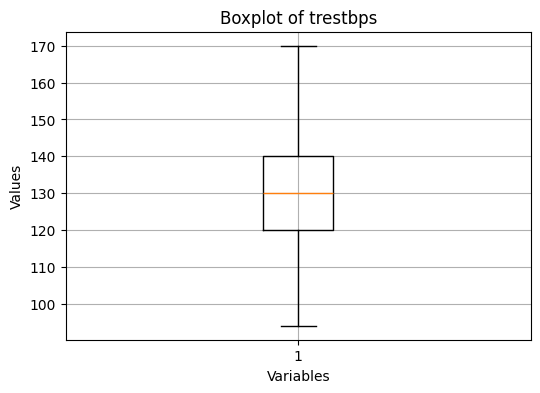

In [20]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['trestbps'] >= lower_bound) & (df['trestbps'] <= upper_bound)]
plt.figure(figsize=(6, 4))
plt.boxplot(df['trestbps'])
plt.title('Boxplot of trestbps')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

Menghitung jumlah nilai yang unik dalam kolom 'target' pada data untuk 1 dan 0 

In [21]:
df.target.value_counts()

target
1    158
0    130
Name: count, dtype: int64

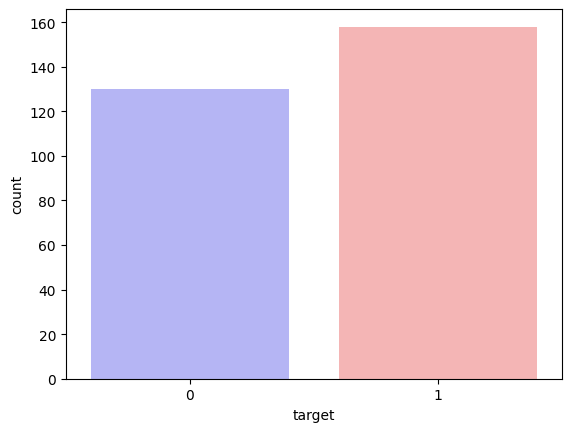

In [22]:
sns.countplot(x="target", data=df, hue="target", palette="bwr", legend=False)
plt.show()

Membuat variabel independen (x) dengan menggunakan metode drop() untuk menghapus kolom "target", dan membuat variabel dependen (y) dengan memilih kolom "target" dari dataframe df dan menyimpannya dalam variabel y. Sehingga variabel x akan berisi fitur-fitur yang digunakan untuk memprediksi target, sementara variabel y akan berisi target yang akan diprediksi.

In [23]:
x = df.drop(labels="target", axis=1)
y = df["target"]

## Membangun Model ANN

Melakukan penskalaan fitur pada data x

In [24]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

Melakukan pembagian dataset menjadi dua bagian, yaitu data training dan testing. Nantinya X_train dan y_train akan digunakan untuk melatih model, dan X_test serta y_test untuk menguji kinerja model pada data yang belum pernah dilihat sebelumnya

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

model ini memiliki 3 hidden layer, 1 input layer, dan 1 output layer

In [45]:
model = Sequential([
    Dense(256, input_shape=(13,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),  
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

In [46]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9271 - loss: 0.3458 - val_accuracy: 0.8261 - val_loss: 0.6367
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9084 - loss: 0.3760 - val_accuracy: 0.8261 - val_loss: 0.6608
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9567 - loss: 0.3586 - val_accuracy: 0.8261 - val_loss: 0.6934
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9639 - loss: 0.3364 - val_accuracy: 0.8261 - val_loss: 0.6528
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9251 - loss: 0.3808 - val_accuracy: 0.7826 - val_loss: 0.6254
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9347 - loss: 0.3581 - val_accuracy: 0.8261 - val_loss: 0.5746
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9470 - loss: 0.3471 - val_accuracy: 0.8261 - val_loss: 0.5661
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9570 - loss: 0.3373 - val_accuracy: 0.8261 - val_loss: 0.6317


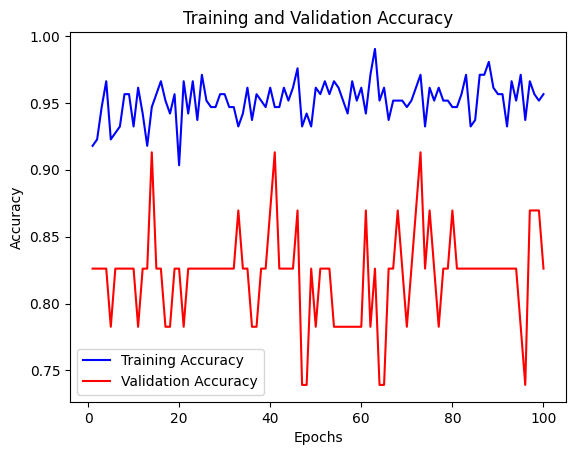

In [51]:
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Menghitung akurasi model pada data uji, dan mencetak akurasi model dalam bentuk persentase.

In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy of ANN Model is: {:.2f}%".format(accuracy * 100))
print(f'Test Loss: {loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9321 - loss: 0.3677 
Test Accuracy of ANN Model is: 91.38%
Test Loss: 0.4022204875946045


### Prediction with Confusion Matrix

In [53]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_pred_flat = np.ravel(y_pred)
y_test_flat = np.ravel(y_test)
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)

print("Confusion Matrix:")
print(conf_matrix)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[25  3]
 [ 2 28]]


In [54]:
print(classification_report(y_test_flat, y_pred_flat))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.90      0.93      0.92        30

    accuracy                           0.91        58
   macro avg       0.91      0.91      0.91        58
weighted avg       0.91      0.91      0.91        58

